In [1]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date
from scipy.interpolate import griddata

import TomTom
import TomTom.Mesh_maker as Mesh_maker
import TomTom.Functions as Functions
import TomTom.Calc_path as Calc_path

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature


from scipy.spatial import Delaunay
import pickle

In [2]:
name = 'D:/DCSM-FM/A06_pieter/DCSM-FM_0_5nm_0017_map.nc'
nc = Dataset(name)
b = -200
x = nc.variables['mesh2d_face_x'][:b]
y = nc.variables['mesh2d_face_y'][:b]
ba = nc.variables['mesh2d_flowelem_bl'][:b]

name = 'D:/DCSM-FM/A06_pieter/DCSM-FM_0_5nm_0017_map.nc'
nc = Dataset(name)
nc.variables.keys()
b = -200
x2 = nc.variables['mesh2d_face_x'][:b]
y2 = nc.variables['mesh2d_face_y'][:b]
ba2 = nc.variables['mesh2d_flowelem_bl'][:b]
x = np.concatenate((x,x2), axis = 0)
y = np.concatenate((y,y2), axis = 0)
ba = np.concatenate((ba,ba2), axis = 0)

In [3]:
x_r = np.arange(4.5,6.5, 0.01)
y_r = np.arange(52.8,53.8, 0.01)
y_r, x_r = np.meshgrid(y_r,x_r)

ba_r = griddata((x,y), ba, (x_r, y_r), method= 'cubic')

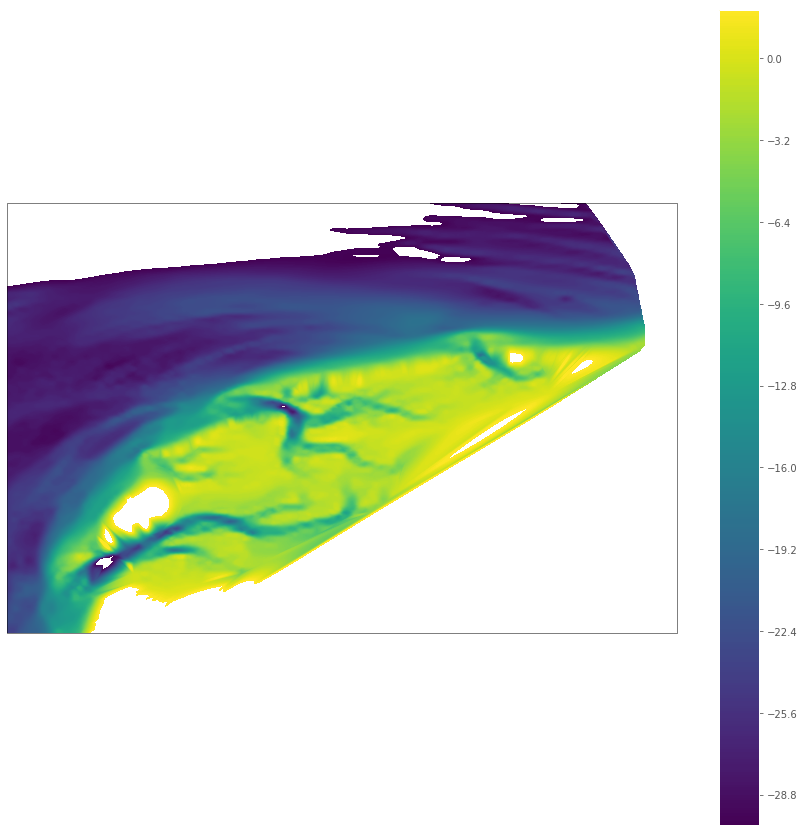

In [4]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())

cval = np.arange(-30,2, 0.1)
plt.contourf(x_r,y_r, ba_r, cval, transform =ccrs.Mercator())
cbar = plt.colorbar()

In [42]:
name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0008_map.nc'
b = -35

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][:b]
y = nc.variables['mesh2d_face_y'][:b]
nodes1 = np.zeros((len(x),2))
nodes1[:,0] = y
nodes1[:,1] = x
bat1 = nc.variables['mesh2d_flowelem_bl'][:b]

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0009_map.nc'
a = 13
b = -101

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][a:b]
y = nc.variables['mesh2d_face_y'][a:b]
nodes2 = np.zeros((len(x),2))
nodes2[:,0] = y
nodes2[:,1] = x
nodes1 = np.concatenate((nodes1, nodes2, ), axis = 0)
bat2 = nc.variables['mesh2d_flowelem_bl'][a:b]
bat1 = np.concatenate((bat1, bat2, ), axis = 0)

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0018_map.nc'
b = -173

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][:b]
y = nc.variables['mesh2d_face_y'][:b]
nodes2 = np.zeros((len(x),2))
nodes2[:,0] = y
nodes2[:,1] = x
nodes1 = np.concatenate((nodes1, nodes2, ), axis = 0)
bat2 = nc.variables['mesh2d_flowelem_bl'][:b]
bat1 = np.concatenate((bat1, bat2, ), axis = 0)

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0013_map.nc'
a = -20000
b = -200

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][a:b]
y = nc.variables['mesh2d_face_y'][a:b]
nodes2 = np.zeros((len(x),2))
nodes2[:,0] = y
nodes2[:,1] = x
nodes1 = np.concatenate((nodes1, nodes2, ), axis = 0)
bat2 = nc.variables['mesh2d_flowelem_bl'][a:b]
bat1 = np.concatenate((bat1, bat2, ), axis = 0)

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0007_map.nc'
b = -300

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][:b]
y = nc.variables['mesh2d_face_y'][:b]
nodes2 = np.zeros((len(x),2))
nodes2[:,0] = y
nodes2[:,1] = x
nodes1 = np.concatenate((nodes1, nodes2, ), axis = 0)
bat2 = nc.variables['mesh2d_flowelem_bl'][:b]
bat1 = np.concatenate((bat1, bat2, ), axis = 0)

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0019_map.nc'
b = -12533

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][:b]
y = nc.variables['mesh2d_face_y'][:b]
nodes2 = np.zeros((len(x),2))
nodes2[:,0] = y
nodes2[:,1] = x
nodes1 = np.concatenate((nodes1, nodes2, ), axis = 0)
bat2 = nc.variables['mesh2d_flowelem_bl'][:b]
bat1 = np.concatenate((bat1, bat2, ), axis = 0)

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0006_map.nc'
a = -19000 + 149 
b = -5649

nc = Dataset(name)
x = nc.variables['mesh2d_face_x'][a:b]
y = nc.variables['mesh2d_face_y'][a:b]
nodes2 = np.zeros((len(x),2))
nodes2[:,0] = y
nodes2[:,1] = x
nodes = np.concatenate((nodes1, nodes2, ), axis = 0)
bat2 = nc.variables['mesh2d_flowelem_bl'][a:b]
bat1 = np.concatenate((bat1, bat2, ), axis = 0)

bat1 = np.array(bat1)

idx = np.unique(nodes, axis = 0, return_index=True)[1]       
nodes = nodes[idx]
bat = bat1[idx]

In [43]:
x_r = np.arange(4.5,6.5, 0.01)
y_r = np.arange(52.8,53.8, 0.01)
y_r, x_r = np.meshgrid(y_r,x_r)

bat_r = griddata((nodes[:,1],nodes[:,0]), bat, (x_r, y_r), method= 'cubic')

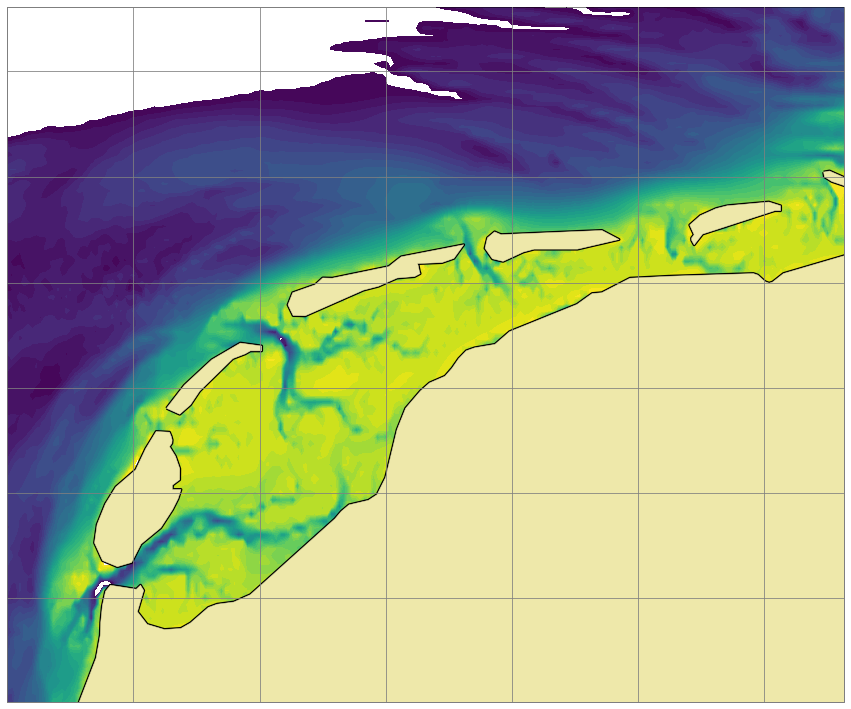

In [48]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())

cval = np.arange(-30,3, 1)
plt.contourf(x_r,y_r, bat_r, cval, transform=ccrs.PlateCarree())
#cbar = plt.colorbar()

ax.coastlines(resolution='10m', color='black', linewidth=3)
ax.gridlines(color = 'grey', zorder = 3)

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))

In [37]:
nodes.shape

(382069, 2)

In [1]:
382069**0.5

618.1173027832177